In [66]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from adjustText import adjust_text
from py_pcha import PCHA
from sklearn.cluster import KMeans


In [67]:
df = pd.read_csv('data_raw/DO_data.csv')
strains = np.delete(df['Strain'].unique(),df['Strain'].unique()=='DO')
colors_dict = {'A/J':'#fbd921', 'C57BL/6J':'#a1a29e','C57BL/6':'#a1a29e', '129S1/SvImJ':'#efaeb6',
               'NOD/ShiLtJ':'#305c9b','NZO/HILtJ':'#89d0e8','PWK/PhJ':'#dd433d',
                'CAST/EiJ':'#4eaf47','WSB/EiJ':'#884187','DO':'#cfcec8'}
df_strains_av = []
for strain in strains:
    df_strain = df[df['Strain']==strain]
    df_strain_av = pd.DataFrame(columns = ['Day','Strain','Weight','Weight.Percent.Loss',
                                           'Temperature','Temperature.Delta',
                                           'RBC','Parasitemia','Parasite.Density'])
    for day,strain_day_data in df_strain.groupby('Day'):
        row = {'Day':[day],'Strain':[strain]}
        for col in df_strain_av.columns[2:]:
            row[col] = [strain_day_data[col].mean()]
        df_strain_av = pd.concat([df_strain_av,pd.DataFrame(row)],ignore_index=True)
    df_strain_av = df_strain_av.dropna()
    df_strains_av.append(df_strain_av)

/var/folders/rv/5ptfmp3s2vv4bd8tl_hpwgw00000gp/T/ipykernel_22327/1032300965.py:16: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

/var/folders/rv/5ptfmp3s2vv4bd8tl_hpwgw00000gp/T/ipykernel_22327/1032300965.py:16: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

/var/folders/rv/5ptfmp3s2vv4bd8tl_hpwgw00000gp/T/ipykernel_22327/1032300965.py:16: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or a

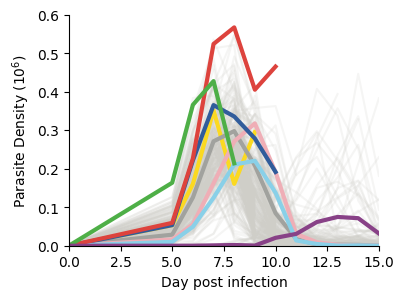

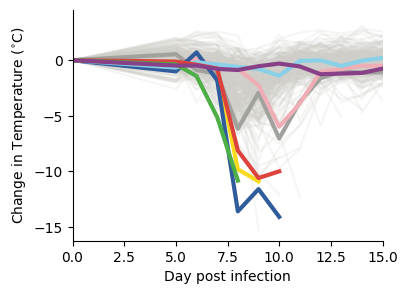

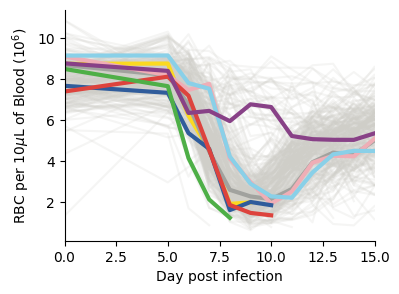

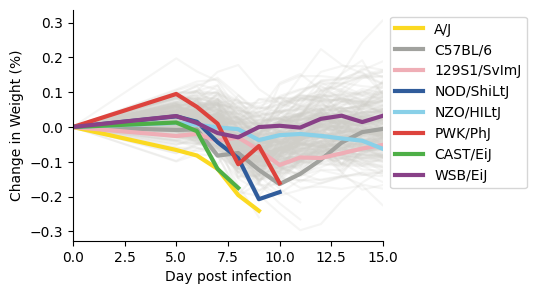

In [68]:
groups = df.groupby('Mouse.ID')
fig_parasitemia,axs_parasitemia = plt.subplots(figsize = (4,3))
fig_temp_delta,axs_temp_delta = plt.subplots(figsize = (4,3))
fig_rbc,axs_rbc = plt.subplots(figsize = (4,3))
fig_weight_delta,axs_weight_delta = plt.subplots(figsize = (4,3))

for group_name,group_df in groups:
    if group_df.iloc[0]['Strain']=='DO':
        if group_name==0:
            axs_parasitemia.plot(group_df['Day'],group_df['Parasitemia'],color = colors_dict['DO'],alpha = 0.2,label = 'DO')
            axs_temp_delta.plot(group_df['Day'],group_df['Temperature.Delta'],color = colors_dict['DO'],alpha = 0.2,label = 'DO')
            axs_rbc.plot(group_df['Day'],group_df['RBC'],color = colors_dict['DO'],alpha = 0.2,label = 'DO')
            axs_weight_delta.plot(group_df['Day'],group_df['Weight.Percent.Loss'],color = colors_dict['DO'],alpha = 0.2,label = 'DO')

        else:
            axs_parasitemia.plot(group_df['Day'],group_df['Parasitemia'],color = colors_dict['DO'],alpha = 0.2)
            axs_temp_delta.plot(group_df['Day'],group_df['Temperature.Delta'],color = colors_dict['DO'],alpha = 0.2)
            axs_rbc.plot(group_df['Day'],group_df['RBC'],color = colors_dict['DO'],alpha = 0.2)
            axs_weight_delta.plot(group_df['Day'],group_df['Weight.Percent.Loss'],color = colors_dict['DO'],alpha = 0.2)
for df_strain_av,strain in zip(df_strains_av,strains):
    axs_parasitemia.plot(df_strain_av['Day'],df_strain_av['Parasitemia'],color = colors_dict[strain],
             lw = 3,label = strain)
    axs_temp_delta.plot(df_strain_av['Day'],df_strain_av['Temperature.Delta'],color = colors_dict[strain],
             lw = 3,label = strain)
    axs_rbc.plot(df_strain_av['Day'],df_strain_av['RBC'],color = colors_dict[strain],
             lw = 3,label = strain)
    axs_weight_delta.plot(df_strain_av['Day'],df_strain_av['Weight.Percent.Loss'],color = colors_dict[strain],
             lw = 3,label = strain)
for i,axs in enumerate([axs_parasitemia,axs_temp_delta,axs_rbc,axs_weight_delta]):
    axs.set_xlabel('Day post infection')
    axs.set_xlim(0,15)
    axs.spines[['right', 'top']].set_visible(False)
    
axs_weight_delta.legend(loc='upper left', bbox_to_anchor=(1, 1))

axs_parasitemia.set_ylim(0,0.6)
axs_parasitemia.set_ylabel('Parasite Density $(10^6)$')
axs_weight_delta.set_ylabel('Change in Weight (%)')
axs_temp_delta.set_ylabel('Change in Temperature ($^{\circ}$C)')
axs_rbc.set_ylabel('RBC per 10$\mu$L of Blood ($10^6$)')

fig_parasitemia.savefig('1D.png',dpi = 600,bbox_inches = 'tight')
fig_weight_delta.savefig('1A.png',dpi = 600,bbox_inches = 'tight')
fig_temp_delta.savefig('1B.png',dpi = 600,bbox_inches = 'tight')
fig_rbc.savefig('1C.png',dpi = 600,bbox_inches = 'tight')



/var/folders/rv/5ptfmp3s2vv4bd8tl_hpwgw00000gp/T/ipykernel_22327/4058182930.py:32: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

/var/folders/rv/5ptfmp3s2vv4bd8tl_hpwgw00000gp/T/ipykernel_22327/4058182930.py:33: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

/var/folders/rv/5ptfmp3s2vv4bd8tl_hpwgw00000gp/T/ipykernel_22327/4058182930.py:34: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



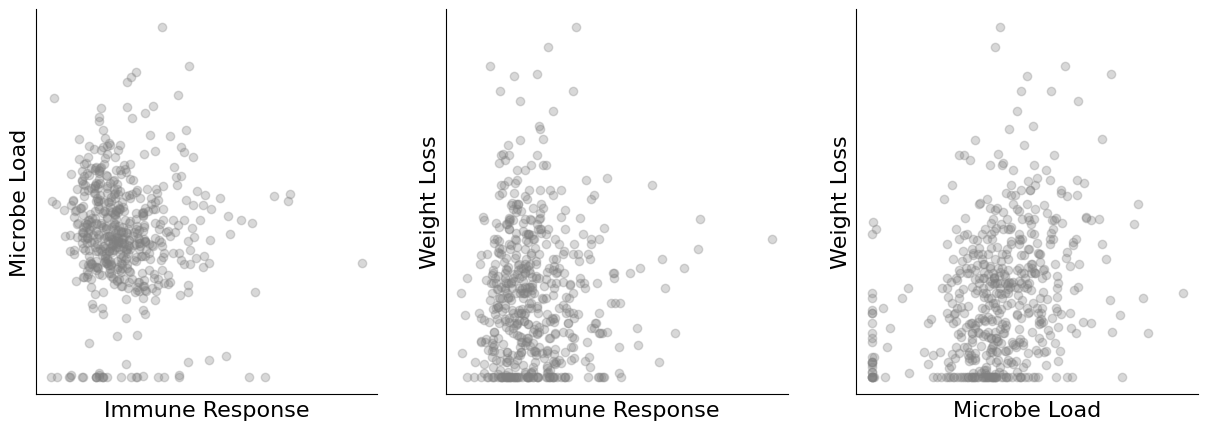

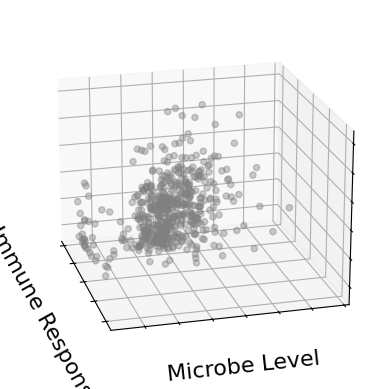

In [70]:
df_maxs = pd.read_csv('../data/df_maxs.csv')
import mpl_toolkits.axisartist as AA
colors_hex_m = ['#1e76b3','#ff7e0d','#2c9f2c','#d52627']
markers_plotly = ['circle','diamond','square','x']

fig,axs = plt.subplots(figsize = (15,5),ncols = 3)
D = 'Weight'
damage_col_name = f'Max.{D}.Delta.zscore'

axs[0].set_xlabel('Immune Response',fontsize = 16)
axs[0].set_ylabel('Microbe Load',fontsize = 16)
axs[0].scatter(df_maxs['Immune.Intensity.zscore'], df_maxs['Max.Parasitemia.zscore'],c='grey',alpha = 0.3,zorder = -1)
axs[1].set_xlabel('Immune Response',fontsize = 16)
axs[1].set_ylabel(f'Weight Loss',fontsize = 16)
axs[1].scatter(df_maxs['Immune.Intensity.zscore'], df_maxs[f'Max.{D}.Delta.zscore'],c='grey',alpha = 0.3,zorder = -1)
axs[2].set_xlabel('Microbe Load',fontsize = 16)
axs[2].set_ylabel(f'Weight Loss',fontsize = 16)
axs[2].scatter(df_maxs['Max.Parasitemia.zscore'], df_maxs[f'Max.{D}.Delta.zscore'],c='grey',alpha = 0.3,zorder = -1,label = 'DO points')
for ax in axs:
    ax.spines[['top','right']].set_visible(False)
    ax.tick_params(left = False, labelleft = False, bottom = False, labelbottom = False)
fig.savefig(f'1E_{D}_just_data.png',dpi = 600)
fig.savefig(f'1E_{D}_just_data.pdf',dpi = 600)

fig4 = plt.figure()

ax4 = fig4.add_subplot(projection='3d')
ax4.scatter(df_maxs['Immune.Intensity.zscore'],df_maxs['Max.Parasitemia.zscore'],df_maxs[damage_col_name],color = 'grey',alpha = 0.4,zorder = -1)
ax4.set_xlabel('Immune Response',fontsize = 16)
ax4.set_ylabel('Microbe Level',fontsize = 16)
ax4.set_zlabel('Weight Loss',fontsize = 16)
ax4.xaxis.set_ticklabels([''])
ax4.yaxis.set_ticklabels([''])
ax4.zaxis.set_ticklabels([''])
ax4.view_init(elev=20., azim=-15, roll=0)

fig4.savefig(f'1E1_{D}_just_data.png',dpi = 600)
fig4.savefig(f'1E1_{D}_just_data.pdf',dpi = 600)


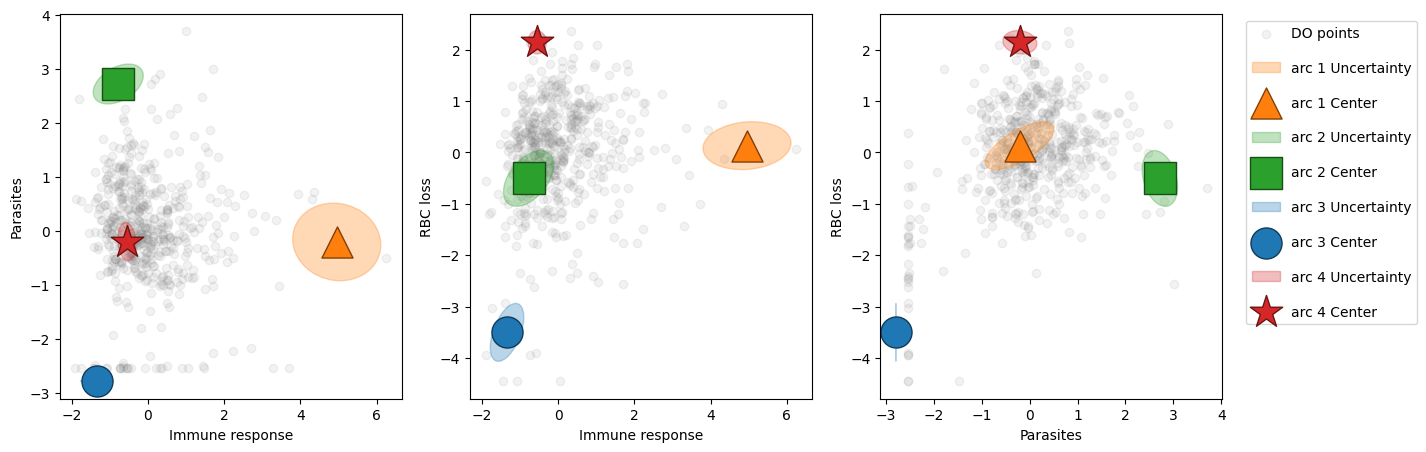

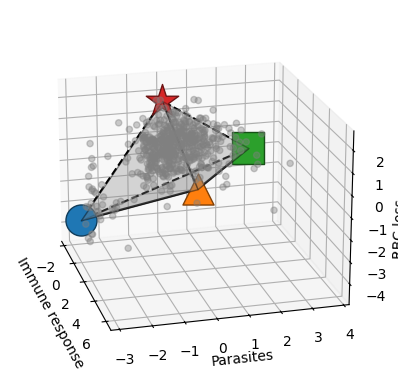

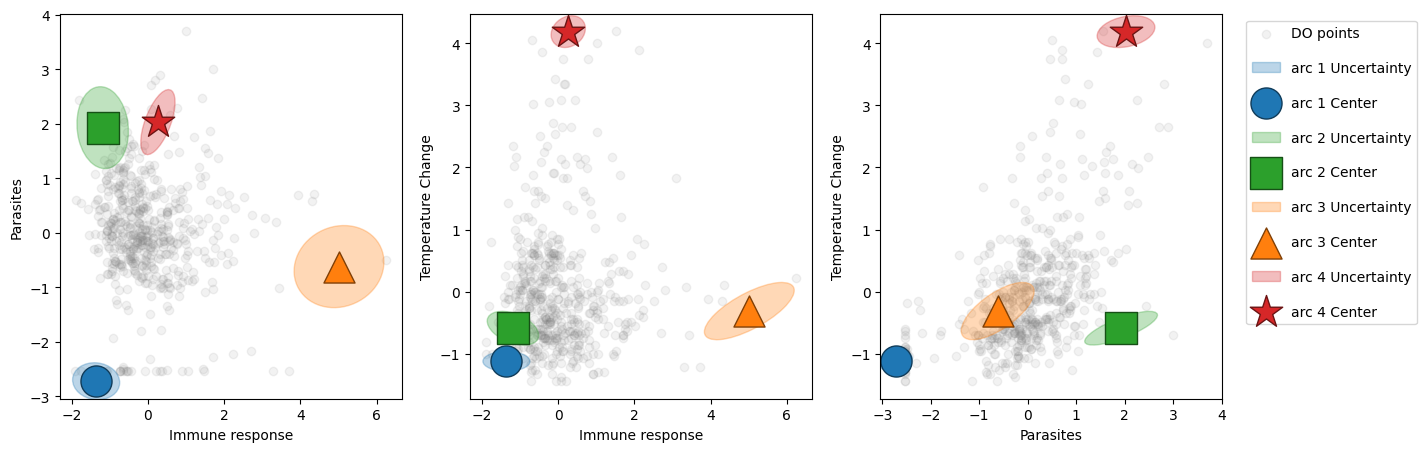

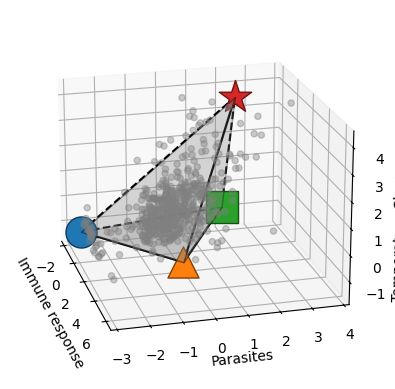

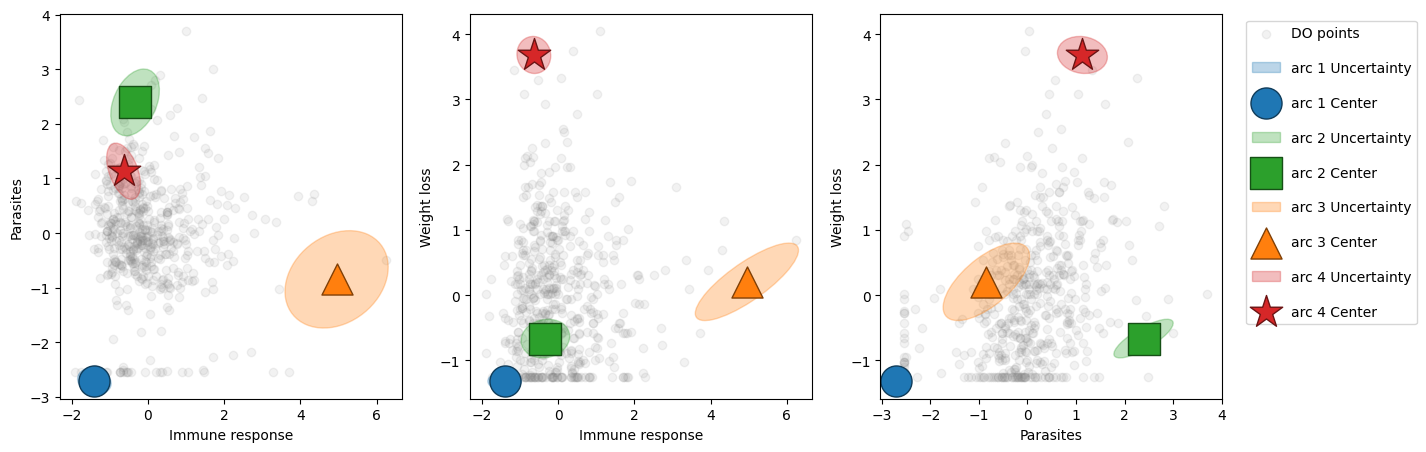

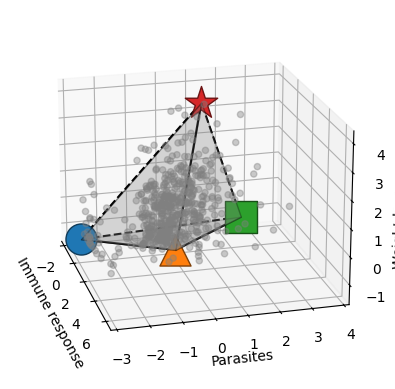

In [71]:
Ds = ['RBC','Temp','Weight']
D_labels = ['RBC loss','Temperature Change', 'Weight loss']
np.random.seed(7)
from matplotlib.patches import Ellipse
%matplotlib inline
bootstrap_num_iterations = 50
num_sample = 200
for D,D_label in zip(Ds,D_labels):
    arcs = []
    for j in range(bootstrap_num_iterations):
        df_sample = df_maxs.sample(num_sample)
        damage_col_name = f'Max.{D}.Delta.zscore'
        MDI = np.array([df_sample['Max.Parasitemia.zscore'],df_sample[damage_col_name],df_sample['Immune.Intensity.zscore']]).transpose()
        try:
            XC, S, C, SSE, varexpl = PCHA(MDI.transpose(), noc=4, delta=0.1)
            arc1 = np.array(XC[:,0]).reshape((3))
            arc2 = np.array(XC[:,1]).reshape((3))
            arc3 = np.array(XC[:,2]).reshape((3))
            arc4 = np.array(XC[:,3]).reshape((3))
            for arc in [arc1,arc2,arc3,arc4] : arcs.append(arc)
        except:
            continue
    arcs = np.array(arcs)
    fig,axs = plt.subplots(ncols = 3,figsize = (15,5))
    axs[0].set_xlabel('zscore I')
    axs[0].set_ylabel('zscore M')
    axs[0].scatter(df_maxs['Immune.Intensity.zscore'], df_maxs['Max.Parasitemia.zscore'],c='grey',alpha = 0.1,zorder = -1)
    axs[1].set_xlabel('zscore I')
    axs[1].set_ylabel(f'zscore D')
    axs[1].scatter(df_maxs['Immune.Intensity.zscore'], df_maxs[f'Max.{D}.Delta.zscore'],c='grey',alpha = 0.1,zorder = -1)
    axs[2].set_xlabel('zscore M')
    axs[2].set_ylabel(f'zscore D')
    axs[2].scatter(df_maxs['Max.Parasitemia.zscore'], df_maxs[f'Max.{D}.Delta.zscore'],c='grey',alpha = 0.1,zorder = -1,label = 'DO points')

    # Perform K-Means clustering
    kmeans = KMeans(n_clusters=4, random_state=0)
    kmeans.fit(arcs)
    # Cluster centers
    cluster_centers = kmeans.cluster_centers_
    labels = kmeans.labels_

    # Calculate uncertainties for each cluster
    uncertainties = []
    for i in range(4):
        # Points in the current cluster
        cluster_points = arcs[labels == i]
        # Calculate distances to the cluster center
        distances = np.linalg.norm(cluster_points - cluster_centers[i], axis=1)
        # Standard deviation of distances as uncertainty
        uncertainties.append(np.std(distances))

    labels_plot = ['arc 1','arc 2','arc 3','arc 4']

    projections = [(2, 0), (2, 1), (0, 1)]  # Pairs of axes for projections
    axis_labels = [("Immune response", "Parasites"), ("Immune response", D_label), ("Parasites", D_label)]

    for k, (ax, (dim1, dim2), (xlabel, ylabel)) in enumerate(zip(axs, projections, axis_labels)):
        for i in range(4):
            # Points in the current cluster
            cluster_points = arcs[labels == i][:, [dim1, dim2]]

            # Covariance matrix for ellipse
            cov_matrix = np.cov(cluster_points.T)
            eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

            # Calculate angle of ellipse
            angle = np.degrees(np.arctan2(eigenvectors[1, 0], eigenvectors[0, 0]))

            # Width and height of the ellipse (scaled eigenvalues)
            width, height = 2 * np.sqrt(eigenvalues)
            if D=='RBC':
                if kmeans.cluster_centers_[i][0]<0 and kmeans.cluster_centers_[i][1]<0 and kmeans.cluster_centers_[i][2]<0:
                    color = 'tab:blue'
                    marker = 'o'
                    markersize = 500
                    edgecolor = '#103c5a'
                elif kmeans.cluster_centers_[i][0]>0:
                    color = 'tab:green'
                    marker = 's'
                    markersize = 500
                    edgecolor = '#165016'
                elif kmeans.cluster_centers_[i][-1]>2:
                    color = 'tab:orange'
                    marker = '^'
                    markersize = 500
                    edgecolor = '#804007'
                else:
                    color= 'tab:red'
                    marker='*'
                    markersize = 600
                    edgecolor = '#6b1414'

            else:
                if kmeans.cluster_centers_[i][0]<0 and kmeans.cluster_centers_[i][1]<0 and kmeans.cluster_centers_[i][2]<0:
                    color = 'tab:blue'
                    marker = 'o'
                    markersize = 500
                    edgecolor = '#103c5a'

                elif kmeans.cluster_centers_[i][-1]>2:
                    color = 'tab:orange'
                    marker = '^'
                    markersize = 500
                    edgecolor = '#804007'

                elif kmeans.cluster_centers_[i][1]>0:
                    color= 'tab:red'
                    marker='*'
                    markersize = 600
                    edgecolor = '#6b1414'
                else:
                    color = 'tab:green'
                    marker = 's'
                    markersize = 500
                    edgecolor = '#165016'
            # Add ellipse to the plot
            if k==2:
                ellipse = Ellipse(
                    xy=kmeans.cluster_centers_[i, [dim1, dim2]],
                    width=width,
                    height=height,
                    angle=angle,
                    color=color,
                    alpha=0.3,
                    label=f'arc {i+1} Uncertainty'
                )
            else:
                ellipse = Ellipse(
                    xy=kmeans.cluster_centers_[i, [dim1, dim2]],
                    width=width,
                    height=height,
                    angle=angle,
                    color=color,
                    alpha=0.3,
                )

            ax.add_artist(ellipse)

            # Add cluster center
            if k==2:
                ax.scatter(kmeans.cluster_centers_[i, dim1],
                            kmeans.cluster_centers_[i, dim2],
                              color=color, marker=marker, s=markersize,
                                label=f'arc {i+1} Center',zorder = 1,edgecolor = edgecolor)
            else:
                ax.scatter(kmeans.cluster_centers_[i, dim1],
                            kmeans.cluster_centers_[i, dim2],
                              color=color, marker=marker, s=markersize,
                              zorder = 1,edgecolor = edgecolor)

        ax.set_xlabel(xlabel)
        ax.set_ylabel(ylabel)
        if k==2:
            ax.legend(bbox_to_anchor = (1.05,1),loc = 'upper left',labelspacing = 1.5 )
        #ax.tick_params(left = False,bottom=False, labelbottom = False, labelleft =False) 

    #fig.suptitle(f'2d projections of disease space and archetypes\nDO Data points',fontsize = 14)
    #textstr = f'Damage = {D}\nImmune response calculated using burst size'
    #plt.text(0.8, 0.0, textstr, fontsize=10, transform=plt.gcf().transFigure)
    fig.savefig(f'1E_{D}.png',dpi = 600, bbox_inches = 'tight')
    fig.savefig(f'1E_{D}.pdf',dpi = 600, bbox_inches = 'tight')

    fig4 = plt.figure()
    ax4 = fig4.add_subplot(projection='3d')
    ax4.scatter(df_maxs['Immune.Intensity.zscore'],df_maxs['Max.Parasitemia.zscore'],df_maxs[damage_col_name],color = 'grey',alpha = 0.4,zorder = -1)
    for i in range(4):
        if D=='RBC':
            if kmeans.cluster_centers_[i][0]<0 and kmeans.cluster_centers_[i][1]<0 and kmeans.cluster_centers_[i][2]<0:
                color = 'tab:blue'
                marker = 'o'
                markersize = 500
                edgecolor = '#103c5a'
                arc1 = kmeans.cluster_centers_[i]
            elif kmeans.cluster_centers_[i][0]>0:
                color = 'tab:green'
                marker = 's'
                markersize = 500
                edgecolor = '#165016'
                arc3 = kmeans.cluster_centers_[i]
            elif kmeans.cluster_centers_[i][-1]>2:
                color = 'tab:orange'
                marker = '^'
                markersize = 500
                edgecolor = '#804007'
                arc2 = kmeans.cluster_centers_[i]
            else:
                color= 'tab:red'
                marker='*'
                markersize = 600
                edgecolor = '#6b1414'
                arc4 = kmeans.cluster_centers_[i]

        else:
            if kmeans.cluster_centers_[i][0]<0 and kmeans.cluster_centers_[i][1]<0 and kmeans.cluster_centers_[i][2]<0:
                color = 'tab:blue'
                marker = 'o'
                markersize = 500
                edgecolor = '#103c5a'
                arc1 = kmeans.cluster_centers_[i]

            elif kmeans.cluster_centers_[i][-1]>2:
                color = 'tab:orange'
                marker = '^'
                markersize = 500
                edgecolor = '#804007'
                arc2 = kmeans.cluster_centers_[i]

            elif kmeans.cluster_centers_[i][1]>0:
                color= 'tab:red'
                marker='*'
                markersize = 600
                edgecolor = '#6b1414'
                arc4 = kmeans.cluster_centers_[i]
            else:
                color = 'tab:green'
                marker = 's'
                markersize = 500
                edgecolor = '#165016'
                arc3 = kmeans.cluster_centers_[i]

        ax4.scatter(kmeans.cluster_centers_[i][2],kmeans.cluster_centers_[i][0],kmeans.cluster_centers_[i][1],color = color,marker = marker,s = markersize,zorder = 1,edgecolors = edgecolor)

    vertices_tr1 = [[arc1[2],arc1[0],arc1[1]],[arc2[2],arc2[0],arc2[1]],[arc3[2],arc3[0],arc3[1]]]
    vertices_tr2 = [[arc1[2],arc1[0],arc1[1]],[arc2[2],arc2[0],arc2[1]],[arc4[2],arc4[0],arc4[1]]]
    vertices_tr3 = [[arc3[2],arc3[0],arc3[1]],[arc2[2],arc2[0],arc2[1]],[arc4[2],arc4[0],arc4[1]]]
    vertices_tr4 = [[arc1[2],arc1[0],arc1[1]],[arc1[2],arc1[0],arc1[1]],[arc4[2],arc4[0],arc4[1]]]
    from mpl_toolkits.mplot3d.art3d import Poly3DCollection

    ax4.add_collection3d(Poly3DCollection([vertices_tr1], color='grey', alpha=0.2,zorder = -1,edgecolor = 'black'))
    ax4.add_collection3d(Poly3DCollection([vertices_tr2], color='grey', alpha=0.3,zorder = 0,edgecolor = 'black'))
    ax4.add_collection3d(Poly3DCollection([vertices_tr3], color='grey', alpha=0.3,zorder = 0,edgecolor = 'black'))
    ax4.add_collection3d(Poly3DCollection([vertices_tr4], color='grey', alpha=0.2,zorder = -1,edgecolor = 'black'))
    ax4.plot([arc1[2],arc2[2]],[arc1[0],arc2[0]],[arc1[1],arc2[1]],color = 'black',zorder = 1)
    ax4.plot([arc2[2],arc3[2]],[arc2[0],arc3[0]],[arc2[1],arc3[1]],color = 'black',zorder = 1)
    ax4.plot([arc1[2],arc3[2]],[arc1[0],arc3[0]],[arc1[1],arc3[1]],'--',color = 'black',zorder = 1)
    ax4.plot([arc1[2],arc4[2]],[arc1[0],arc4[0]],[arc1[1],arc4[1]],'--',color = 'black',zorder = 1)
    ax4.plot([arc3[2],arc4[2]],[arc3[0],arc4[0]],[arc3[1],arc4[1]],'--',color = 'black',zorder = 1)
    ax4.plot([arc2[2],arc4[2]],[arc2[0],arc4[0]],[arc2[1],arc4[1]],color = 'black',zorder = 1)

    ax4.set_ylabel('Parasites')
    ax4.set_zlabel(D_label)
    ax4.set_xlabel('Immune response',rotation = 90)
    ax4.xaxis.labelpad = 0
    ax4.yaxis.labelpad = 0
    ax4.zaxis.labelpad = 0
    #ax4.tick_params(axis = 'both',bottom = False, right =False, labelleft = False, labelbottom = False)
    ax4.view_init(elev=20., azim=-15, roll=0)

    fig4.savefig(f'1E1_{D}.png',dpi = 600)
    fig4.savefig(f'1E1_{D}.pdf',dpi = 600)

    plt.show()

    import plotly.graph_objects as go
    import numpy as np

    fig = go.Figure()
    ax4.scatter(df_maxs['Immune.Intensity.zscore'],df_maxs['Max.Parasitemia.zscore'],df_maxs[damage_col_name],color = 'grey',alpha = 0.4,zorder = -1)

    fig.add_trace(go.Scatter3d(
        x=df_maxs['Immune.Intensity.zscore'],
        y=df_maxs['Max.Parasitemia.zscore'],
        z=df_maxs[damage_col_name],
        mode='markers',
        marker=dict(size=3, color='grey', opacity=0.6),
        name='Data Summary'
    ))
    names = ['Arc 1','Arc 2','Arc 3','Arc 4']
    # Add archetype points
    for arc, c, m, n in zip([arc1, arc2, arc3, arc4], colors_hex_m, markers_plotly, names):
        fig.add_trace(go.Scatter3d(
            x=[arc[2]],
            y=[arc[0]],
            z=[arc[1]],
            mode='markers',
            marker=dict( color=c, symbol=m),
            name=f"{n}"
        ))

    # Create mesh triangles (Plotly uses i, j, k for triangle faces)
    vertices = np.array([
        [arc1[2], arc1[0], arc1[1]],
        [arc2[2], arc2[0], arc2[1]],
        [arc3[2], arc3[0], arc3[1]],
        [arc4[2], arc4[0], arc4[1]]
    ])
    x, y, z = vertices[:, 0], vertices[:, 1], vertices[:, 2]

    # Indices for triangle faces
    faces = [
        [0, 1, 2],
        [0, 1, 3],
        [1, 2, 3],
        [0, 0, 3]
    ]

    i, j, k = zip(*faces)

    fig.add_trace(go.Mesh3d(
        x=x, y=y, z=z,
        i=i, j=j, k=k,
        color='lightgrey',
        opacity=0.3,
        name='Archetype Volume',
        flatshading=True,
        showscale=False
    ))

    # Add connecting lines (manually, as in matplotlib `plot`)
    def add_line(p1, p2, dashed=False):
        fig.add_trace(go.Scatter3d(
            x=[p1[2], p2[2]],
            y=[p1[0], p2[0]],
            z=[p1[1], p2[1]],
            mode='lines',
            line=dict(color='black', width=2, dash='dash' if dashed else 'solid'),
            showlegend=False
        ))

    add_line(arc1, arc2)
    add_line(arc2, arc3)
    add_line(arc1, arc3, dashed=True)
    add_line(arc1, arc4, dashed=True)
    add_line(arc3, arc4, dashed=True)
    add_line(arc2, arc4)

    # Set axis limits
    fig.update_layout(
        scene=dict(
            xaxis=dict(title='Immune Response', showticklabels=False, showbackground=True),
            yaxis=dict(title='Parasites', showticklabels=False, showbackground=True),
            zaxis=dict(title=f'Damage ({D_label})', showticklabels=False, showbackground=True),
            camera=dict(eye=dict(x=1.5, y=-1.5, z=1), up=dict(x=0, y=0, z=1))
        ),
        #margin=dict(l=0, r=0, b=0, t=30),
        title=f'3D Data Plot with Archetypes'
    )

    fig.write_html(f'{D}_3D_plot.html')
    fig.show()



In [75]:
np.random.seed(7)
def tetrahedron_volume(points):
    p1, p2, p3, p4 = points
    v = np.abs(np.dot(p2 - p1, np.cross(p3 - p1, p4 - p1))) / 6.0
    return v
Ds = ['RBC','Temp','Weight']
D_labels = ['RBC loss','Temperature Change', 'Weight loss']

def sample_from_empirical_marginals(data, size=None, seed=None, plotting="hazen"):
    """
    Draw a new dataset where each column is sampled independently from the
    empirical CDF (marginal) of that column in `data`.

    Parameters
    ----------
    data : (N,3) array_like
        Original dataset (each column is one axis: x, y, z).
    size : int or None
        Number of samples to generate. If None, uses N (i.e., same size).
    seed : int or None
        Random seed for reproducibility.
    plotting : {"hazen","weibull","median","bernard","blom","gringorten","Cunnane"}
        Choice of plotting-position formula for the ECDF (affects tail behavior slightly).
        Default "hazen": (i - 0.5)/N.

    Returns
    -------
    samples : (size,3) ndarray
        New data with each column drawn from the corresponding marginal CDF
        of `data` (independently across columns).
    """
    rng = np.random.default_rng(seed)
    data = np.asarray(data)
    if data.ndim != 2 or data.shape[1] != 3:
        raise ValueError("`data` must have shape (N, 3).")
    N = data.shape[0]
    M = N if size is None else int(size)

    # Choose plotting-position coefficients (p = (i - a)/(N + b))
    # References commonly used in hydrology/statistics.
    schemes = {
        "weibull":  (0.0, 1.0),     # i/(N+1)
        "median":   (1/3, 1/3),     # (i-1/3)/(N+1/3)
        "bernard":  (0.3, 0.4),
        "blom":     (3/8, 1/4),
        "gringorten": (0.44, 0.12),
        "Cunnane":  (0.4, 0.2),
        "hazen":    (0.5, 0.0),     # (i-0.5)/N  (default)
    }
    if plotting not in schemes:
        raise ValueError(f"Unknown plotting scheme '{plotting}'")
    a, b = schemes[plotting]

    def inverse_ecdf_sample(col, m):
        # Sort values and build plotting-position probabilities
        v = np.sort(col)
        # Handle constant columns robustly
        if np.all(v == v[0]):
            return np.full(m, v[0], dtype=float)

        i = np.arange(1, N + 1, dtype=float)
        p = (i - a) / (N + b)
        # Ensure strictly within [0,1] for safe interpolation
        p = np.clip(p, 1e-12, 1 - 1e-12)

        # Draw uniforms and invert the ECDF via linear interpolation
        u = rng.random(m)
        # Guard edges by adding (0, v_min) and (1, v_max)
        p_ext = np.concatenate(([0.0], p, [1.0]))
        v_ext = np.concatenate(([v[0]], v, [v[-1]]))
        return np.interp(u, p_ext, v_ext)

    # Sample each axis independently
    x_new = inverse_ecdf_sample(data[:, 0], M)
    y_new = inverse_ecdf_sample(data[:, 1], M)
    z_new = inverse_ecdf_sample(data[:, 2], M)

    return np.column_stack([x_new, y_new, z_new])


def xc_to_arcs (XC):
    arcs = []
    arc1 = np.array(XC[:,0]).reshape((3))
    arc2 = np.array(XC[:,1]).reshape((3))
    arc3 = np.array(XC[:,2]).reshape((3))
    arc4 = np.array(XC[:,3]).reshape((3))
    for arc in [arc1,arc2,arc3,arc4] : arcs.append(arc)
    arcs = np.array(arcs)
    return arcs
from scipy.spatial import ConvexHull, QhullError

def convex_hull_volume(points, joggle_if_needed=False, tol=1e-12):
    """
    Compute the volume of the convex hull of 3D points.

    Parameters
    ----------
    points : (N,3) array_like
        Input points (e.g., shape (531,3)).
    joggle_if_needed : bool, default False
        If True, retries with Qhull option 'QJ' to handle nearly-coplanar data.
    tol : float, default 1e-12
        Tolerance for rank test to detect truly degenerate (<=2D) data.

    Returns
    -------
    float
        Volume of the convex hull (units^3). Returns 0.0 if data are degenerate.
    """
    pts = np.asarray(points, dtype=float)
    if pts.ndim != 2 or pts.shape[1] != 3:
        raise ValueError("`points` must have shape (N, 3).")

    # Quick degeneracy check: colinear/coplanar -> zero volume
    if np.linalg.matrix_rank(pts - pts.mean(axis=0), tol=tol) < 3:
        return 0.0

    try:
        return float(ConvexHull(pts).volume)
    except QhullError:
        if joggle_if_needed:
            # 'QJ' slightly perturbs points to make them full-dimensional
            return float(ConvexHull(pts, qhull_options="QJ").volume)
        # If we get here, treat as degenerate or numerically unstable
        return 0.0

def convex_hull_points_3d(points,  allow_joggle=False, tol=1e-12):
    """
    Return the convex-hull vertex coordinates as an (m,3) array.

    Parameters
    ----------
    points : (N,3) array_like
        Input 3D points.
    allow_joggle : bool, default False
        If True, retries Qhull with 'QJ' for nearly-degenerate inputs.
    tol : float
        Tolerance for rank tests.

    Returns
    -------
    hull_pts : (m,3) ndarray
        The coordinates of the convex-hull vertices.
    """
    pts = np.asarray(points, dtype=float)
    if pts.ndim != 2 or pts.shape[1] != 3:
        raise ValueError("`points` must have shape (N,3).")

    # Deduplicate to avoid Qhull issues and keep mapping to original order.
    uniq_pts, uniq_first_idx = np.unique(pts, axis=0, return_index=True)

    # Handle trivial cases
    if uniq_pts.shape[0] <= 2:
        # Hull is the unique endpoints (or a single point)
        return uniq_pts

    centered = uniq_pts - uniq_pts.mean(axis=0)
    rank = np.linalg.matrix_rank(centered, tol=tol)
    # Full 3D hull
    if rank >= 3:
        try:
            hull = ConvexHull(uniq_pts)
        except QhullError:
            if not allow_joggle:
                raise
            hull = ConvexHull(uniq_pts, qhull_options="QJ")
        idx = idx[np.argsort(uniq_first_idx[idx])]
        return uniq_pts[idx]

    # Nearly planar: project to 2D via PCA, take 2D hull, map back
    if rank == 2:
        # PCA basis (columns are principal directions)
        V = np.linalg.svd(centered, full_matrices=False)[2].T  # (3,3)
        B = V[:, :2]                                           # (3,2)
        proj2d = centered @ B                                  # (M,2)
        hull2d = ConvexHull(proj2d)
        idx = idx[np.argsort(uniq_first_idx[idx])]
        return uniq_pts[idx]

    # Colinear: take the two extreme points along first principal axis
    # (rank == 1)
    direction = np.linalg.svd(centered, full_matrices=False)[2].T[:, 0]
    t = centered @ direction
    extremes = np.unique([int(np.argmin(t)), int(np.argmax(t))])
    idx = idx[np.argsort(uniq_first_idx[idx])]
    return uniq_pts[idx]

num_reshuffles = 10
for D,D_label in zip(Ds,D_labels):
    damage_col_name = f'Max.{D}.Delta.zscore'
    MDI = np.array([df_maxs['Max.Parasitemia.zscore'],df_maxs[damage_col_name],df_maxs['Immune.Intensity.zscore']]).transpose()
    XC, S, C, SSE, varexpl = PCHA(MDI.transpose(), noc=4, delta=0.1)
    arcs = xc_to_arcs(XC)
    vol_og = tetrahedron_volume(arcs)
    vol_convex_hull_og = convex_hull_volume(MDI)
    t_og = vol_og/vol_convex_hull_og
    print(vol_og, vol_convex_hull_og)
    print(t_og)
    ts = []
    for i in range(num_reshuffles):
        mdi_reshuffled = sample_from_empirical_marginals(MDI)
        mdi_r_convex_hull = convex_hull_points_3d(mdi_reshuffled)
        XC_r, S_r, C_r, SSE_r, varexpl_r = PCHA(mdi_r_convex_hull.transpose(), noc=4, delta=0.1)
        arcs_r = xc_to_arcs(XC_r)
        vol_r = tetrahedron_volume(arcs_r)
        vol_convex_hull_r = convex_hull_volume(mdi_reshuffled)
        ts.append(vol_r / vol_convex_hull_r)
    fig,ax = plt.subplots()
    ax.hist(ts)
    fig.suptitle(D_label)

38.968364023951715 118.6748774235202
0.32836237011548464


UnboundLocalError: cannot access local variable 'idx' where it is not associated with a value

38.968364023951715


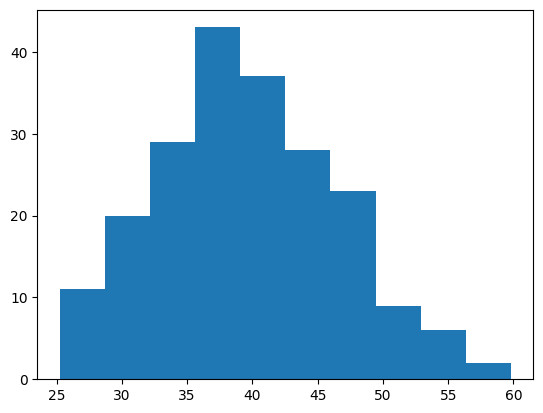

In [ ]:
plt.hist(vols)
print(vol_og)